## Merve TUTAR 1901022050
## ÖDEV
## PGM Okuma ve Yazma Fonksiyonları

## 1 

3x3 piksel boyutunda bir görüntü oluşturunuz. Üreteceğiniz görüntü aşağıdaki değerleri alacaktır:
101 102 103
104 105 106
107 108 109 
Kendi yazacağınız mypgmwrite isimli Python kodu ile bu görüntüyü test.pgm isminde bir dosyaya yazdırınız. P5 (binary) formatta yazdırmanız gerekmektedir.

In [1]:
import numpy as np

def mypgmwrite(filename, data, width, height, maxval=255):
    
    with open(filename, 'wb') as f: # wb-> dosyayı binary modda açar
        
        # pgm formatını header a yaz
        header = f'P5\n{width} {height}\n{maxval}\n'
        
        f.write(bytearray(header, 'ascii'))

        # Her satırdaki veriyi dosyaya binary olarak yaz
        for row in data: # data = yazacağımız 3x3 matris
            f.write(bytearray(row)) # bytearray->  stringi byte dizisine dönüştürür
            

In [2]:
im = [[101, 102, 103],
      [104, 105, 106],
      [107, 108, 109]]

#3x3 piksel boyutunda görüntüyü test.pgm isminde bir dosyaya yazdır
mypgmwrite('test.pgm',im,3,3)

# 2 
Kendi yazacağınız mypgmread isimli Python kodu ile test.pgm isimli dosyayı okuyunuz. Dosyayı okuduktan sonra birinci pikselin değerinin 101, ikincinin 102, … olduğunu print() fonksiyonu ile yazdırarak kontrol ediniz.

In [3]:
def mypgmread(filename):
    
    with open(filename, 'rb') as f:
        
        # Dosyanın ilk iki baytınının "P5" olup olmadığını kontrol et
        magic_number = f.readline().decode('ascii').strip()
        assert magic_number == 'P5', 'Invalid PGM'

        
        while True:
            #Dosyadan bir satır oku, ASCII karakterlere çevir, başındaki ve sonundaki boşlukları temizle
            line = f.readline().decode('ascii').strip()
            if not line.startswith('#'):# Yorum satırlarını atla
                break

        # Genişlik, yükseklik ve maksimum değeri oku
        
        width, height = map(int, line.split()) #line adındaki stringi boşluk karakterlerine göre ayırır bu ayrılmış liste üzerinde int fonksiyonunu her bir elemana uygula
        maxval = int(f.readline().decode('ascii').strip())

        image_data = []#Görüntü verisini depolamak için liste oluştur
        
        for _ in range(height):
            row = []
            for _ in range(width):
                pixel_value = ord(f.read(1))#Dosyadan bir bayt oku ve ASCII değere dönüştür
                row.append(pixel_value)
            image_data.append(row)

        return image_data, width, height, maxval

In [4]:
# test.pgm dosyasını oku
image_data, width, height, maxval = mypgmread('test.pgm')

# Her pikselin değerini kontrol et
for i in range(height):
    for j in range(width):
        print(image_data[i][j], end=' ')
    print()

101 102 103 
104 105 106 
107 108 109 


# 3
50 x 50 pixel boyutunda bir görüntü oluşturunuz. Üreteceğiniz görüntü aşağıdaki değerleri alacaktır.

10 13 16 … … … …
 …  …  … … … … …
10 13 16 … … … …

Ürettiğiniz karanliktanaydinliga.pgm isimli PGM uzantılı dosyayı aşağıda belirtildiği gibi Irfanview vb. bir program kullanarak görebilir ve doğru bir dosya üretip üretmediğinizi doğrulayabilirsiniz.

In [6]:
def create_image(width, height, start_value=10, step=3):
    image_data = [] # Boş bir görüntü verisi listesi oluştur
    for _ in range(height):
        row = [] # Her satır için boş bir liste oluşturulur
        value = start_value # # Satırın ilk değeri, başlangıç değeri olarak atanır->10
        for _ in range(width):
            row.append(value)# Değer, satır listesine eklenir
            value += step  # Bir sonraki değeri hesaplamak için adım eklenir
            if value > 255:# Eğer değer 255'ten büyükse,
                value = 10 # Değeri 10'a sıfırla 
        image_data.append(row) # # Oluşan satır, görüntü verisi listesine eklenir
    return image_data # Oluşturulan görüntü verisi döndürülür

# 50x50 boyutundaki görüntü verisi oluştur başlangıç=10, 3'er artacak
image_data = create_image(50, 50, 10, 3)

# 50x50 görüntüyü karanliktanaydinliga.pgm dosyasına yazdır
mypgmwrite('karanliktanaydinliga.pgm', image_data, 50, 50)

In [9]:
#karanliktanaydinliga.pgm dosyasını oku
image_data, width, height, maxval = mypgmread('karanliktanaydinliga.pgm')
image_array = np.array(image_data, dtype=np.uint8)# numpy dizisine çevir
print(image_array)# piksel değerlerini kontrol etmek için bastır

[[ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]
 ...
 [ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]
 [ 10  13  16 ... 151 154 157]]


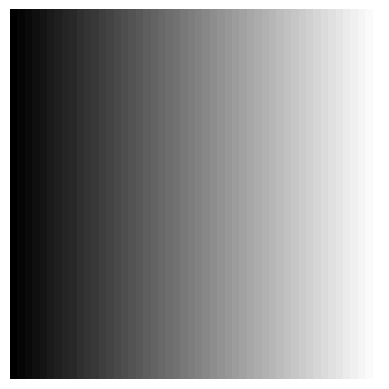

In [12]:
import matplotlib.pyplot as plt

# görüntüyü bastır
plt.imshow(image_data, cmap='gray')
plt.axis('off') 
plt.show()

### irfanview ekran görüntüsü

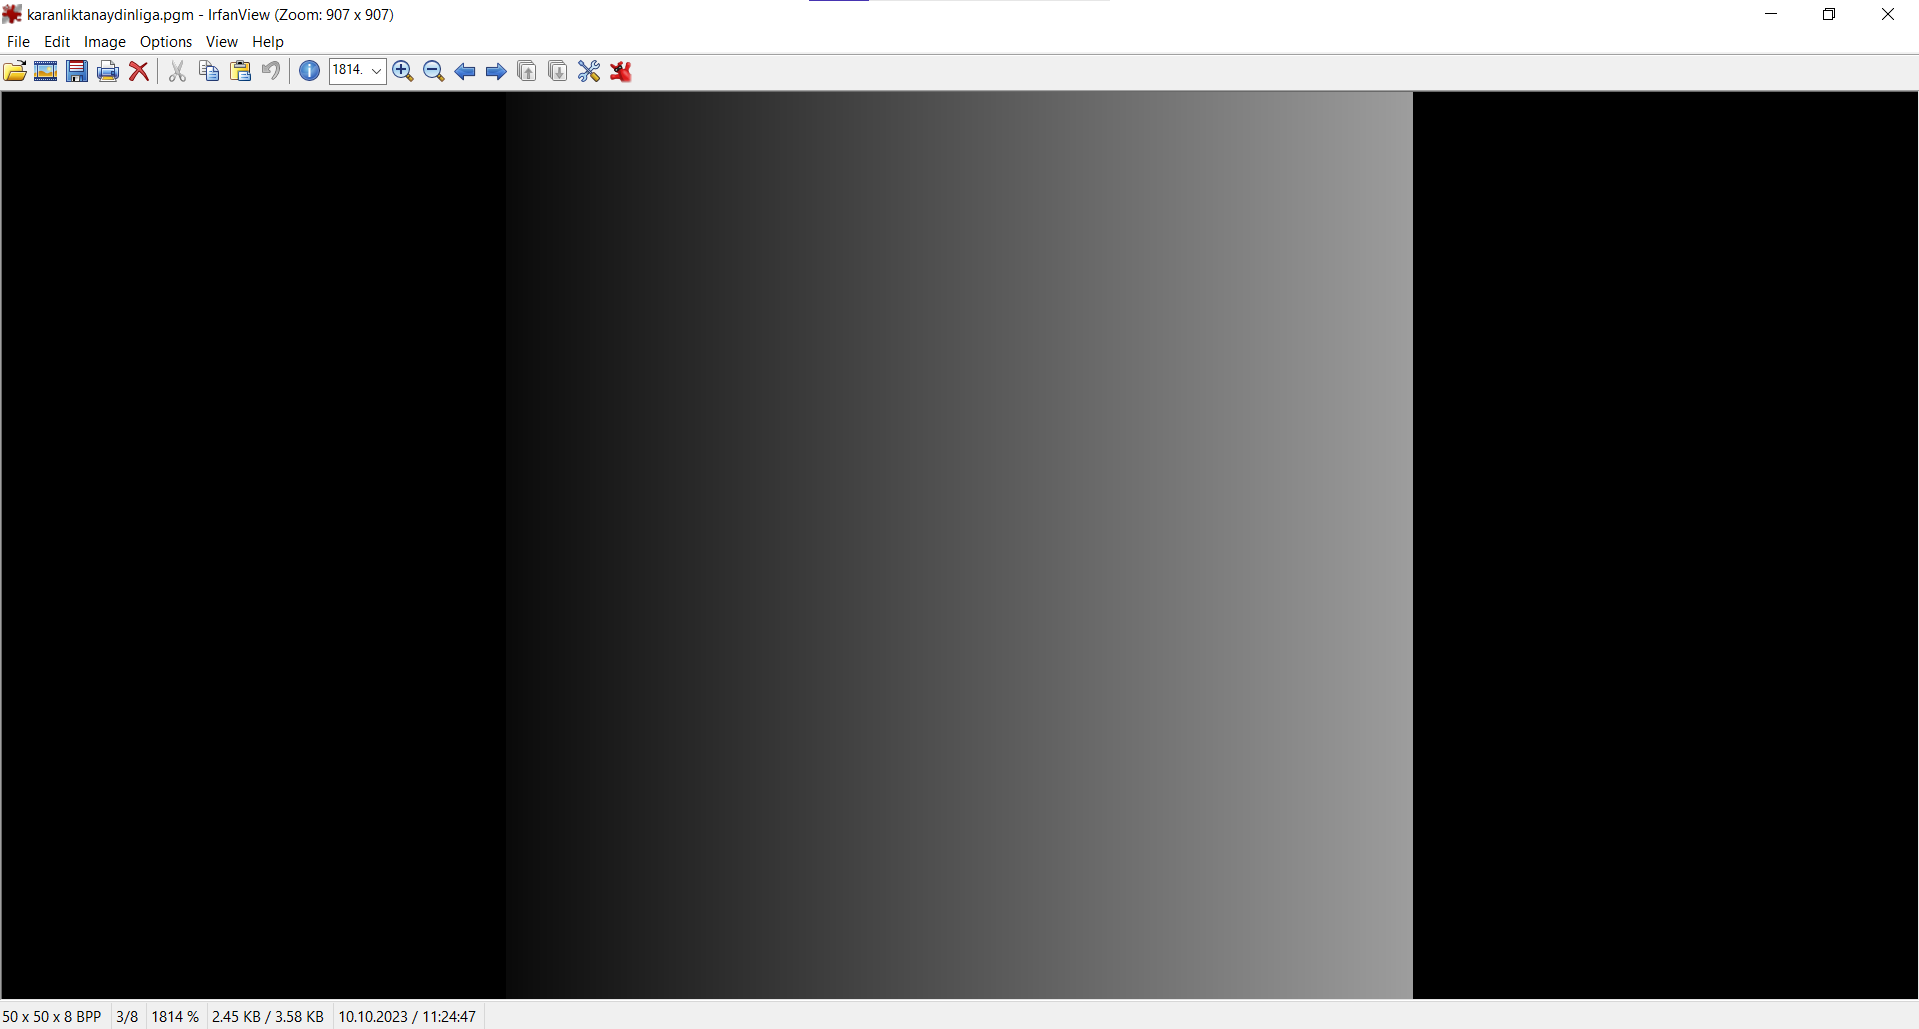

# 4 
Ekte verilen lena.pgm dosyasını okuyunuz ve 30. ve 50. numaralı satır aralığındaki tüm piksellere sıfır (0) değerini atadıktan sonra myLena.pgm dosyasına yazdırınız.

[[160 160 160 ... 160 166 160]
 [160 160 160 ... 160 166 160]
 [160 160 160 ... 160 166 160]
 ...
 [ 45  47  47 ...  63  84  84]
 [ 47  47  47 ...  84  93  99]
 [ 45  47  47 ...  93  99  99]]


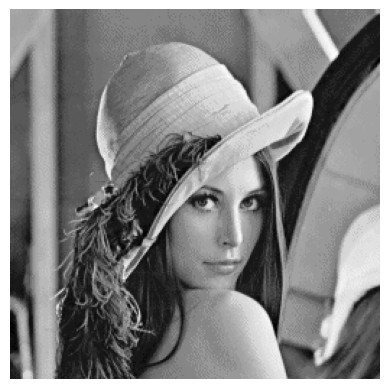

In [14]:
# lena.pgm dosyasını oku
image_data, width, height, maxval = mypgmread('lena.pgm')

# numpy dizisine çevir
image_array = np.array(image_data, dtype=np.uint8)
print(image_array)
# görüntüyü bastır
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()


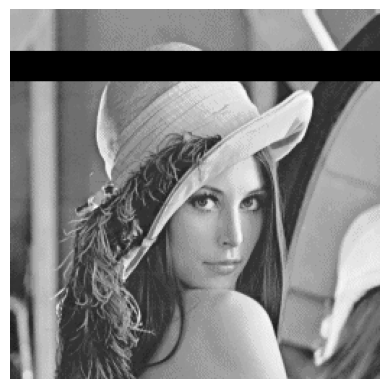

In [19]:
# 30. ve 50. numaralı satır aralığındaki piksellere sıfır değerini ata
for i in range(29, 50):  # 30. ve 50. satır aralığı
    for j in range(width):
        image_data[i][j] = 0
        
# myLena.pgm dosyasına yazdır
mypgmwrite('myLena.pgm', image_data, width, height, maxval)  
# numpy dizisine çevir
image_array = np.array(image_data, dtype=np.uint8)

# Görüntüyü bastır
plt.imshow(image_array, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()


### irfanview ekran görüntüsü

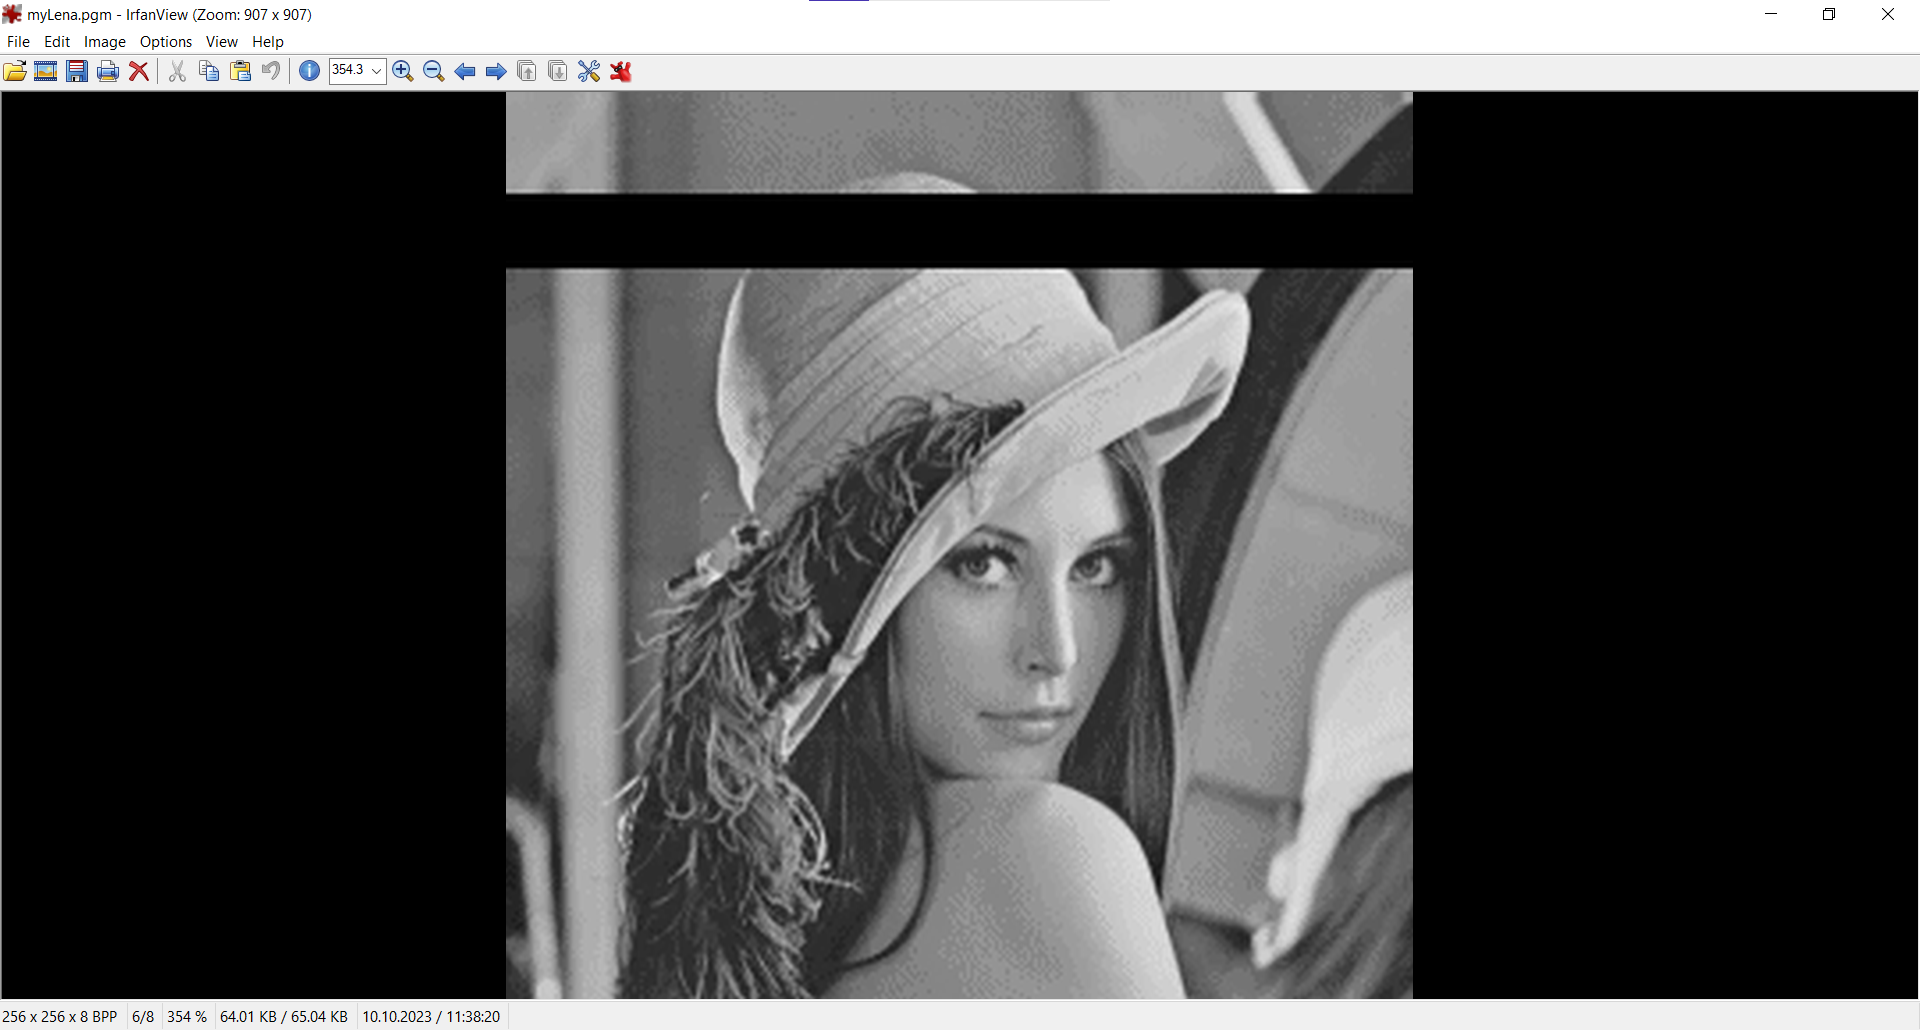